<b>

<p>
<center>
<font size="5">
Movie Recommendation System -
Item Item Collaborative Filtering
</font>
</center>
</p>



<p>
<center>
<font size="4">
DATS_6202: Machine Learning 1
</font>
</center>
</p>

<p>
<center>
<font size="4">
Final Project - Group 1
</font>
</center>
</p>


<p>
<center>
<font size="3">
By: Swetha Kalla, Jyoti Sharma, and Tanvi Hindwan
</font>
</center>
</p>

</b>



# Introduction

The purpose of recommender system is to suggest the relevant items that a user would be interested in. Item-based collaborative system is one of the famous stable filtering techniques that today’s steaming companies like netflix and amazon are using for their users.

Collaborative filtering helps to build a model which is based on user's past behaviour. In the precise words, it is a method of making automatic predictions (filtering) about the interests of a user by collecting preferences or taste information from many users (collaborating). 

In our present research, item-based movie recommendation system has been built using the movielens 100K dataset. Item-based Collaborative filtering works on the principle based on similarity between each pair of items. Here, the items for finding similarity are movies. We tried to find similarity between each movie pair and based on that, we recommended similar movies which are liked by the users in the past.

# Research Methods
In this section, we will put forward the research methods that we have applied to understand how movie recommender system works.

## Data Preprocessing: 
The datasets were collected by the GroupLens Research Project at the University of Minnesota.This data set consists of 100,000 ratings (1-5) from 943 users on 1682 movies.  


In [1]:
#this all is very basic preprocsing here we are just sorting the csv we shld be using for the system. which are ratings, movie details, and items 
# let me know your thoughts on this will update it about the features & targets
# Import necessaru packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from scipy import sparse
import warnings
warnings.filterwarnings("ignore")



In [2]:
#importing the rating dataset csv file in to dataframe
rating_cols = ['user_id', 'movie_id', 'rating', 'unix_timestamp']
df_ratings = pd.read_csv('data1.csv', sep='\t', names=rating_cols)
df_ratings.head()

,user_id,movie_id,rating,unix_timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


In [3]:
users_cols = ['user_id', 'age', 'sex', 'occupation', 'zip_code']
df_users = pd.read_csv('user.csv', sep='|', names=users_cols, parse_dates=True)
df_users.head()


,user_id,age,sex,occupation,zip_code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


In [4]:
# this is the function we just created for ourself just to view complete end to end columns output 
def display_all(df):
    with pd.option_context("display.max_rows",1000):
        with pd.option_context("display.max_columns",1000):
            display(df)

In [5]:
items_cols = ['movie_id' , 'movie_title' , 'release_date' , 'video_release_date' , 'IMDb_URL' , 'unknown|' , 'Action|' , 'Adventure|', 'Animation|', "Children's|", 'Comedy|', 'Crime|', 'Documentary|', 'Drama|',\
              'Fantasy|', 'Film-Noir|', 'Horror|', 'Musical|', 'Mystery|', 'Romance|', 'Sci-Fi|', 'Thriller|', \
              'War|', 'Western|']
df_items = pd.read_csv('item.csv', sep='|', encoding='latin-1', names=items_cols, parse_dates=True)
display_all(df_items.head())

,movie_id,movie_title,release_date,video_release_date,IMDb_URL,unknown|,Action|,Adventure|,Animation|,Children's|,Comedy|,Crime|,Documentary|,Drama|,Fantasy|,Film-Noir|,Horror|,Musical|,Mystery|,Romance|,Sci-Fi|,Thriller|,War|,Western|
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995),0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0


In [6]:
movie_cols = ['movie_id', 'title', 'release_date', 'video_release_date', 'imdb_url']
df_movies = pd.read_csv('item.csv', sep='|', names=movie_cols, usecols=range(5), encoding='latin-1')
df_movies.shape

(1682, 5)

In [7]:
df_movies.head(10)

,movie_id,title,release_date,video_release_date,imdb_url
0,1,Toy Story (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Toy%20Story%2...
1,2,GoldenEye (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?GoldenEye%20(...
2,3,Four Rooms (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Four%20Rooms%...
3,4,Get Shorty (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Get%20Shorty%...
4,5,Copycat (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Copycat%20(1995)
5,6,Shanghai Triad (Yao a yao yao dao waipo qiao) ...,01-Jan-1995,NaN,http://us.imdb.com/Title?Yao+a+yao+yao+dao+wai...
6,7,Twelve Monkeys (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Twelve%20Monk...
7,8,Babe (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Babe%20(1995)
8,9,Dead Man Walking (1995),01-Jan-1995,NaN,http://us.imdb.com/M/title-exact?Dead%20Man%20...
9,10,Richard III (1995),22-Jan-1996,NaN,http://us.imdb.com/M/title-exact?Richard%20III...


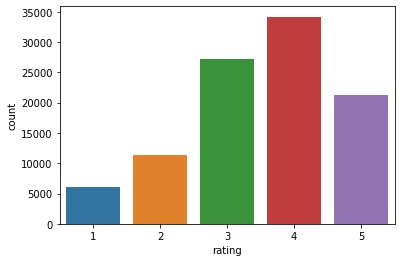

In [8]:
# Count plot for visualizing rating to see the best higest overall rating given by users
sns.countplot(x='rating', data=df_ratings)

In [9]:
print(df_ratings.isnull().sum())



user_id           0
movie_id          0
rating            0
unix_timestamp    0
dtype: int64


In [10]:
#imputing missing values with 1
df_items.fillna(1,inplace=True)
print(df_items.isnull().sum())

movie_id              0
movie_title           0
release_date          0
video_release_date    0
IMDb_URL              0
unknown|              0
Action|               0
Adventure|            0
Animation|            0
Children's|           0
Comedy|               0
Crime|                0
Documentary|          0
Drama|                0
Fantasy|              0
Film-Noir|            0
Horror|               0
Musical|              0
Mystery|              0
Romance|              0
Sci-Fi|               0
Thriller|             0
War|                  0
Western|              0
dtype: int64


In [11]:
# imputing null values with 1
df_movies.fillna(1,inplace=True)

# Checking movies dataframe again if all the null/nans are handled
print(df_movies.isnull().sum())


movie_id              0
title                 0
release_date          0
video_release_date    0
imdb_url              0
dtype: int64


# Creating Subset DataFrame :
After the data preprocessing, the new subset data frame with four variables “user id”, “movie id”, rating”, and “movie titles” has been created (from original rating and movie dataframe)  using “pd.merge” command. 


In [12]:
# Creating a new dataframe object using movies,and rating dataframe by applying join on "movie_id" (which is common in both)
ratings  = pd.merge(df_ratings,df_movies, on ='movie_id')
ratings  = ratings.drop(columns = ['unix_timestamp', 'release_date', 'video_release_date', 'imdb_url'])
ratings.head()

,user_id,movie_id,rating,title
0,196,242,3,Kolya (1996)
1,63,242,3,Kolya (1996)
2,226,242,5,Kolya (1996)
3,154,242,3,Kolya (1996)
4,306,242,5,Kolya (1996)


# Dataframe Transformation
This data frame is further converted into the pivot table. The transformed data frame is in the form of sparse matrix with each user’s rating for each movie based on the information from subset dataframe. It should be noted that NAN means those users have not rated that movie. However, we are involved in to item-based collaborative filtering so our main attention is to find the relationships between each pair of movie. 

In [13]:
userRatings = ratings.pivot_table(index=['user_id'],columns=['title'],values='rating')
userRatings.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,2.0,5.0,NaN,NaN,3.0,4.0,NaN,NaN,...,NaN,NaN,NaN,5.0,3.0,NaN,NaN,NaN,4.0,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,2.0,NaN,NaN,NaN,NaN,4.0,NaN,NaN,...,NaN,NaN,NaN,4.0,NaN,NaN,NaN,NaN,4.0,NaN


# Similarity Measure:

The similarity measure that we applied to found the similarity score among different movie pair is “Pearson Correlation” method (using corr() function). Here we build the correlation matrix with similarity score among movies where at least 50 users has rated the same pair of movies in common.Correlation corr() function has computed the correlation score for every column pair found in entire matrix. So we can see the similarity score here in output below.

It can be noted that the movies with lower correlation score means they are dissimilar. The parameter: min_periods is set to restrict the results for the similarity score such that at least 50 users had rated the same pair of movie in common. 

- In the first attempt we just applied the corr() function to see the similaity matrix matrix but later we applied our similarity measure Pearson Correlation with threshold to restrict our results.



In [14]:
coormatrix = userRatings.corr()
coormatrix.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
title,,,,,,,,,,,,,,,,,,,,,
'Til There Was You (1997),1.0,NaN,-1.000000,-0.500000,-0.500000,0.522233,NaN,-0.426401,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1-900 (1994),NaN,1.0,NaN,NaN,NaN,NaN,NaN,-0.981981,NaN,NaN,...,NaN,NaN,NaN,-0.944911,NaN,NaN,NaN,NaN,NaN,NaN
101 Dalmatians (1996),-1.0,NaN,1.000000,-0.049890,0.269191,0.048973,0.266928,-0.043407,NaN,0.111111,...,NaN,-1.000000,NaN,0.158840,0.119234,0.680414,0.000000,0.707107,NaN,NaN
12 Angry Men (1957),-0.5,NaN,-0.049890,1.000000,0.666667,0.256625,0.274772,0.178848,NaN,0.457176,...,NaN,NaN,NaN,0.096546,0.068944,-0.361961,0.144338,1.000000,1.0,NaN
187 (1997),-0.5,NaN,0.269191,0.666667,1.000000,0.596644,NaN,-0.554700,NaN,1.000000,...,NaN,0.866025,NaN,0.455233,-0.500000,0.500000,0.475327,NaN,NaN,NaN


In [15]:
coormatrix = userRatings.corr(method='pearson', min_periods=50)
coormatrix.head()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
title,,,,,,,,,,,,,,,,,,,,,
'Til There Was You (1997),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1-900 (1994),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
101 Dalmatians (1996),NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12 Angry Men (1957),NaN,NaN,NaN,1.0,NaN,NaN,NaN,0.178848,NaN,NaN,...,NaN,NaN,NaN,0.096546,NaN,NaN,NaN,NaN,NaN,NaN
187 (1997),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## New User Profile
For interpreting our results with the principle of item based recommendation system, we added a dummy user to the dataset. The dummy user has been created and randomly assigned some movies with ratings, which later are utilized to predict similar movies

In [16]:
# Lets add one dummy user to the dataset with some ratings given on three movies as below

# Pass the row elements as key value pairs to append() function 
userRatings = userRatings.append({"Lion King, The (1994)":5, "Young Guns (1988)":1, "Toy Story (1995)": 5},
                                 ignore_index=True)

In [17]:
userRatings.tail()

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
939,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
940,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
941,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
942,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,4.0,3.0,NaN,NaN,NaN,NaN
943,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN


In [18]:
userRatings.shape

(944, 1664)

In [19]:
# Details of the dummy user added to the dataset
dummyuser_ratings  = userRatings.loc[943].dropna()
dummyuser_ratings

title
Lion King, The (1994)    5.0
Toy Story (1995)         5.0
Young Guns (1988)        1.0
Name: 943, dtype: float64

# Results:

Getting the Similar Movie Recommendations

In this section, we will put forward the results that we have obtained from the research methods that we have applied.

From the item based collaborative filtering system we found that for each movie rated by the dummy user, a list of similar movies were recommended based on the similarity score from the correlation matrix, which has been scaled on the basis of how well the movies were rated in dummy user profile. 


In [20]:
# We will iterate through all the movies that are liked by the dummy user and will find all the possible similar movies

#Creating the series for similar movies 
similar_movies = pd.Series()

#iterating through each movie that is rated by dummy user: ranging from 0 to number of ratings in dummy user(myratings)
for i in range(0, len(dummyuser_ratings.index)):
    print("Similarities for movie:" + dummyuser_ratings.index[i]) 
    
    #getting the list of similar movies to ones of users rated
    #dropna is for dropping missing values if any    
    siml = coormatrix[dummyuser_ratings.index[i]].dropna()
    
    # Scaling the resulting correlation score by how well the dummy user has rated that movie
    # For example: Here we are going through all the similarities for first movie "Lion King, The (1994)" 
    # and scale them by rating 5 and so on.    
    siml = siml.map(lambda x: x * dummyuser_ratings[i])
    
    #add the score to the list of similar movies  
    similar_movies = similar_movies.append(siml)
    


#avoid similar movie names to be listed multiple times. So, We group them to add their score together for those movies 
similar_movies = similar_movies.groupby(similar_movies.index).sum()

# Sorting the similar movies at the top
similar_movies.sort_values(inplace = True, ascending = False)

#Avoiding Displaying the already rated movies from the output

similar_movies = similar_movies.drop(dummyuser_ratings.index)
similar_movies.head(10)

Similarities for movie:Lion King, The (1994)
Similarities for movie:Toy Story (1995)
Similarities for movie:Young Guns (1988)


Robin Hood: Prince of Thieves (1991)           5.188938
Beauty and the Beast (1991)                    5.142471
Aladdin (1992)                                 4.838503
Winnie the Pooh and the Blustery Day (1968)    4.643764
Jungle Book, The (1994)                        4.607264
Fox and the Hound, The (1981)                  4.583560
Cool Runnings (1993)                           4.419270
Cinderella (1950)                              4.385974
Firm, The (1993)                               4.380654
Mrs. Doubtfire (1993)                          4.332134
dtype: float64

# Discussion & Future Scope:

It can be seen clearly, mostly movies that are recommended to the dummy user were of same genre that is animations and of the same production house that is disney.This is how item-based recommendation worked for our research based on the user’s profile. The item based collaborative system works better than the content based system because it is stable, which means the ratings given by users does not change over the period of time likewise human taste. However, still there are some limitations of the item based recommendation system. One of the major limitation is cold start, which means it can not handle new items if the item like that is not rated previously. Moreover, it require enogh users to find the similar items in the system.

There is still the scope of improvement in the presesnt work. As, combination of content and collaborative system can be build to check the improvement of the recommender system. Also, we can involve some large datsets like 10M sized, where we can build the recommender system using PySpark because of its high computation power. There are certain other python libraries are also available like "Surprise" package that can be utilized for building and testing recommendation engines.